In [1]:
library(parsedate)

Read the stats from the CSV file, prevent quotes to interfere

In [2]:
data <- read.csv("stats.csv", stringsAsFactors=FALSE, sep=",", quote="")

Plot the results (for now using plot() as qqplot() was not that easy to use)

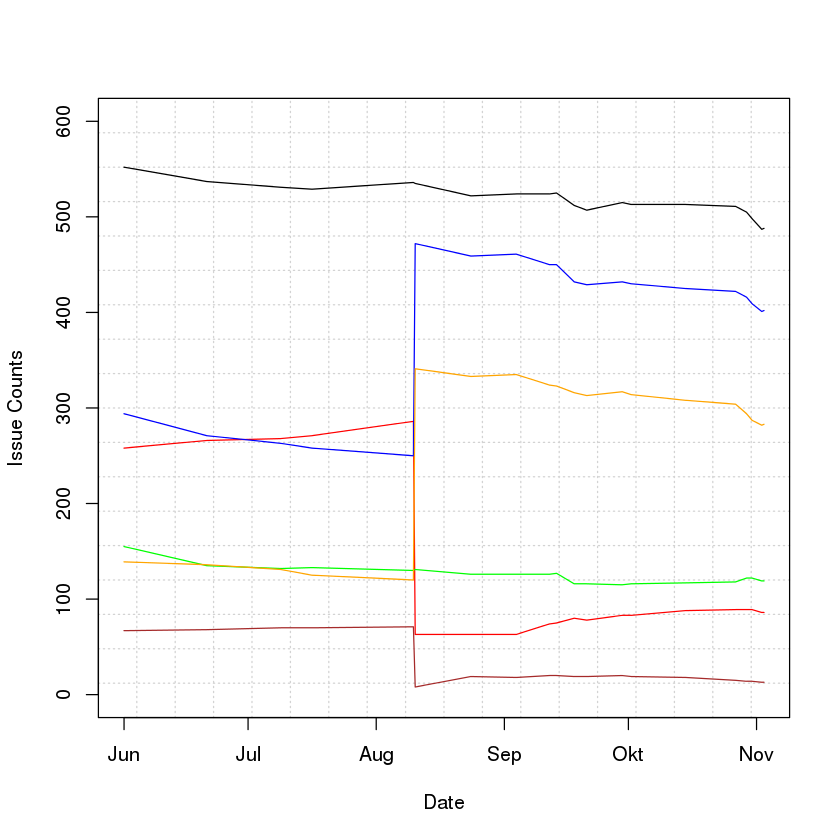

In [3]:
plot(parse_date(data$Date, approx = TRUE), data$Open.overall, type="l", 
    ylim=c(0, 600), panel.first = grid(18, 18), xlab="Date", ylab="Issue Counts")
lines(parse_date(data$Date, approx = TRUE), data$Enhancements, col="red")
lines(parse_date(data$Date, approx = TRUE), data$Actual.bugs, col="blue")
lines(parse_date(data$Date, approx = TRUE), data$Needinfo, col="green")
lines(parse_date(data$Date, approx = TRUE), data$Workable.bugs, col="orange")
lines(parse_date(data$Date, approx = TRUE), data$Bugs.with.patch, col="brown")

# Below is dumpheap

In [4]:
data

,Date,Timestamp,Bugs.overall,Open.overall,Enhancements,Actual.bugs,Needinfo,Workable.bugs,Bugs.with.patch,Opened.last.week,Changed.last.week,Closed.last.week,Distribution
1,2015-05-31 23:44,0,3362,552,258,294,155,139,67,0,0,0,{}
2,2015-06-20 23:59,0,3380,537,266,271,135,136,68,0,0,0,{}
3,2015-07-08 21:49,0,3398,531,268,263,132,131,70,5,19,11,{}
4,2015-07-16 11:25,0,3403,529,271,258,133,125,70,5,16,7,{}
5,2015-08-09 23:56,0,3431,536,286,250,130,120,71,13,25,10,{}
6,2015-08-10 10:21,0,3431,535,63,472,131,341,8,12,24,9,{XSSF=109; HSSF=88; HWPF=36; HSLF=33; XWPF=22; XSLF=14; POI Overall=10; SS Common=9; SXSSF=8; HPSF=5; OPC=3; POIFS=2; HDGF=1; HSMF=1}
7,2015-08-23 21:46,0,3443,522,63,459,126,333,19,7,28,20,{XSSF=103; HSSF=89; HWPF=36; HSLF=33; XWPF=22; XSLF=15; SS Common=11; SXSSF=8; POI Overall=7; HPSF=5; HDGF=1; HSMF=1; OPC=1; POIFS=1}
8,2015-09-03 21:29,0,3448,524,63,461,126,335,18,4,17,4,{XSSF=105; HSSF=89; HWPF=36; HSLF=34; XWPF=22; XSLF=15; SS Common=10; SXSSF=8; POI Overall=7; HPSF=5; HDGF=1; HSMF=1; OPC=1; POIFS=1}
9,2015-09-11 21:26,0,3461,524,74,450,126,324,20,11,34,15,{XSSF=93; HSSF=89; HWPF=37; HSLF=33; XWPF=22; XSLF=15; SS Common=12; SXSSF=8; POI Overall=6; HPSF=5; HDGF=1; HSMF=1; OPC=1; POIFS=1}
10,2015-09-13 14:40,0,3463,525,75,450,127,323,20,11,27,12,{XSSF=91; HSSF=89; HWPF=37; HSLF=33; XWPF=22; XSLF=15; SS Common=13; SXSSF=8; POI Overall=6; HPSF=5; HDGF=1; HSMF=1; OPC=1; POIFS=1}


In [5]:
str(data)

'data.frame':	22 obs. of  13 variables:
 $ Date             : chr  "2015-05-31 23:44" "2015-06-20 23:59" "2015-07-08 21:49" "2015-07-16 11:25" ...
 $ Timestamp        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Bugs.overall     : int  3362 3380 3398 3403 3431 3431 3443 3448 3461 3463 ...
 $ Open.overall     : int  552 537 531 529 536 535 522 524 524 525 ...
 $ Enhancements     : int  258 266 268 271 286 63 63 63 74 75 ...
 $ Actual.bugs      : int  294 271 263 258 250 472 459 461 450 450 ...
 $ Needinfo         : int  155 135 132 133 130 131 126 126 126 127 ...
 $ Workable.bugs    : int  139 136 131 125 120 341 333 335 324 323 ...
 $ Bugs.with.patch  : int  67 68 70 70 71 8 19 18 20 20 ...
 $ Opened.last.week : int  0 0 5 5 13 12 7 4 11 11 ...
 $ Changed.last.week: int  0 0 19 16 25 24 28 17 34 27 ...
 $ Closed.last.week : int  0 0 11 7 10 9 20 4 15 12 ...
 $ Distribution     : chr  "{}" "{}" "{}" "{}" ...


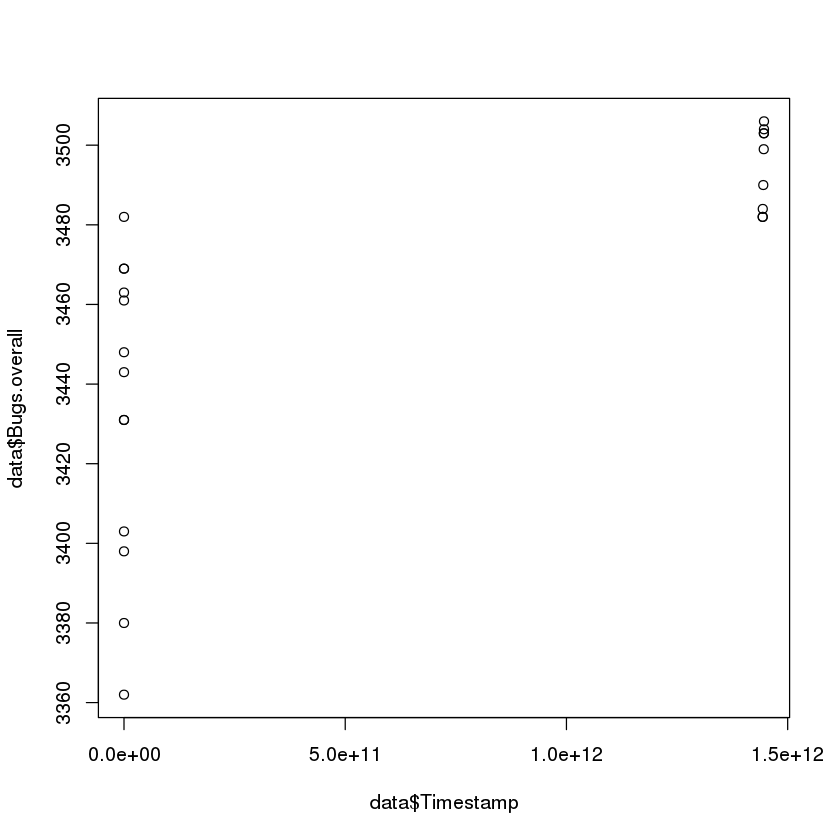

In [6]:
plot(data$Timestamp, data$Bugs.overall)

In [7]:
parse_date(data$Date, approx = TRUE)

 [1] "2015-05-31 23:44:00 UTC" "2015-06-20 23:59:00 UTC"
 [3] "2015-07-08 21:49:00 UTC" "2015-07-16 11:25:00 UTC"
 [5] "2015-08-09 23:56:00 UTC" "2015-08-10 10:21:00 UTC"
 [7] "2015-08-23 21:46:00 UTC" "2015-09-03 21:29:00 UTC"
 [9] "2015-09-11 21:26:00 UTC" "2015-09-13 14:40:00 UTC"
[11] "2015-09-17 21:24:00 UTC" "2015-09-20 22:17:00 UTC"
[13] "2015-09-29 12:35:00 UTC" "2015-09-29 12:46:00 UTC"
[15] "2015-09-29 12:47:00 UTC" "2015-10-01 16:07:00 UTC"
[17] "2015-10-14 21:28:00 UTC" "2015-10-26 22:14:00 UTC"
[19] "2015-10-29 13:48:00 UTC" "2015-10-30 22:36:00 UTC"
[21] "2015-11-02 06:26:00 UTC" "2015-11-02 19:16:00 UTC"

In [8]:
library(ggplot2)

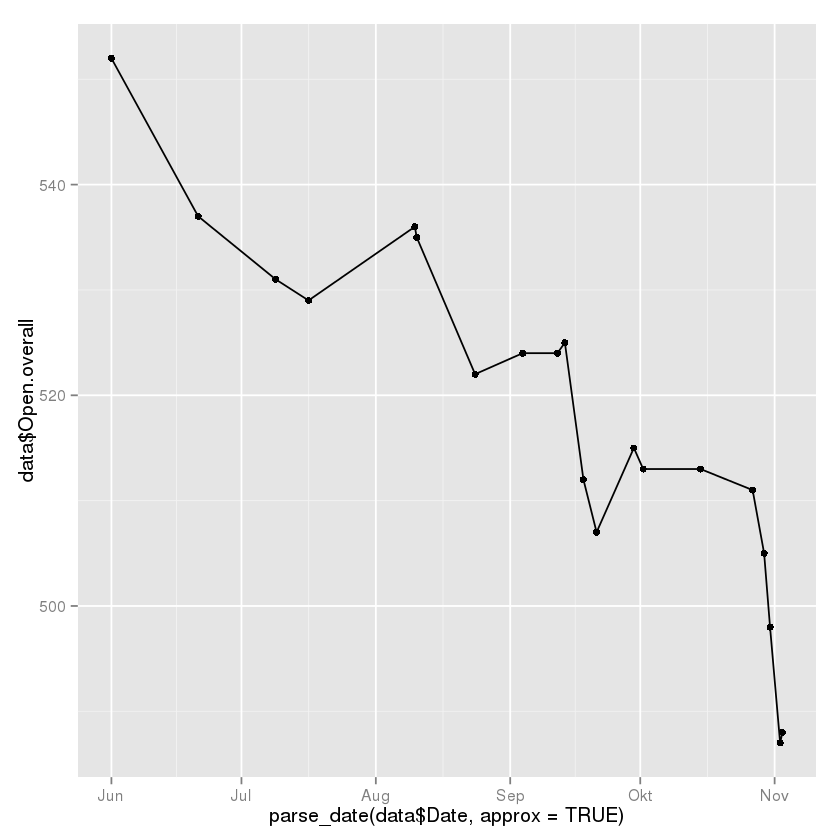

In [9]:
qplot(x=parse_date(data$Date, approx = TRUE), y=data$Open.overall) + geom_line() + geom_point()

In [13]:
?axis

axis {graphics},R Documentation
side,"an integer specifying which side of the plot the axis is to be drawn on. The axis is placed as follows: 1=below, 2=left, 3=above and 4=right."
at,"the points at which tick-marks are to be drawn. Non-finite (infinite, NaN or NA) values are omitted. By default (when NULL) tickmark locations are computed, see ‘Details’ below."
labels,"this can either be a logical value specifying whether (numerical) annotations are to be made at the tickmarks, or a character or expression vector of labels to be placed at the tickpoints. (Other objects are coerced by as.graphicsAnnot.) If this is not logical, at should also be supplied and of the same length. If labels is of length zero after coercion, it has the same effect as supplying TRUE."
tick,a logical value specifying whether tickmarks and an axis line should be drawn.
line,"the number of lines into the margin at which the axis line will be drawn, if not NA."
pos,the coordinate at which the axis line is to be drawn: if not NA this overrides the value of line.
outer,"a logical value indicating whether the axis should be drawn in the outer plot margin, rather than the standard plot margin."
font,"font for text. Defaults to par(""font"")."
lty,line type for both the axis line and the tick marks.
"lwd, lwd.ticks",line widths for the axis line and the tick marks. Zero or negative values will suppress the line or ticks.
